<a href="https://colab.research.google.com/github/Gylla/Proyecto-Integrador/blob/master/Proyecto_Strava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget -O strava_data.csv https://raw.githubusercontent.com/Gylla/Proyecto-Integrador/refs/heads/master/Data/strava_data.csv
df = pd.read_csv('strava_data.csv', sep=",")

--2025-04-24 20:09:02--  https://raw.githubusercontent.com/Gylla/Proyecto-Integrador/refs/heads/master/Data/strava_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43773 (43K) [text/plain]
Saving to: ‘strava_data.csv’

strava_data.csv     100%[===================>]  42.75K  --.-KB/s    in 0.01s   

2025-04-24 20:09:02 (3.51 MB/s) - ‘strava_data.csv’ saved [43773/43773]



# Primeras exploraciones

Tareas:

*   Explorar las diferentes columnas y conocer los elementos únicos.
*   Identificar datos categóricos.
*   Determinar que columnas se relacionan entre sí.




In [3]:
df.head()

,start_date_local,type,name,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_heartrate,max_heartrate
0,2022-11-18T08:38:29Z,Walk,Morning Walk,3563.3,2122,99.0,1.679,5.622,100.8,130.0
1,2022-11-17T16:06:02Z,Ride,Evening Ride,30646.5,5742,130.0,5.337,12.612,121.1,166.0
2,2022-11-15T17:42:54Z,Ride,Evening Ride,34271.7,5653,118.0,6.063,10.222,121.5,167.0
3,2022-11-12T08:05:43Z,Ride,Morning Ride,181300.0,28762,808.0,6.303,14.963,149.3,179.0
4,2022-11-10T20:22:58Z,Walk,Evening Walk,4251.3,3305,70.0,1.286,2.009,88.0,141.0


In [4]:
df.shape

(544, 10)

In [5]:
# Análisis de valores únicos por columna
print("\n" + "="*60)
print("ANÁLISIS DE VALORES ÚNICOS POR COLUMNA".center(60))
print("="*60 + "\n")

for i, columna in enumerate(df.columns, 1):
    # Obtener valores únicos
    valores_unicos = df[columna].unique()
    num_unicos = len(valores_unicos)

    # Mostrar información de la columna
    print(f"\nCOLUMNA {i}: {columna}".ljust(50) + f"({num_unicos} valores únicos)")
    print("-"*60)

    # Mostrar valores únicos (con formato para listas largas)
    if num_unicos <= 10:
        print(valores_unicos)
    else:
        print(f"Primeros 5 valores: {valores_unicos[:5]}")
        print(f"Últimos 5 valores: {valores_unicos[-5:]}")
        print(f"\nMuestra de valores intermedios: {valores_unicos[5:10]}" if num_unicos > 10 else "")

    # Estadísticas adicionales
    print(f"\nTipo de dato: {df[columna].dtype}")
    if pd.api.types.is_numeric_dtype(df[columna]):
        print(f"Rango: {df[columna].min()} - {df[columna].max()}")

    print("="*60)

print("\n" + "ANÁLISIS COMPLETADO".center(60, "~") + "\n")


           ANÁLISIS DE VALORES ÚNICOS POR COLUMNA           


COLUMNA 1: start_date_local                      (471 valores únicos)
------------------------------------------------------------
Primeros 5 valores: ['2022-11-18T08:38:29Z' '2022-11-17T16:06:02Z' '2022-11-15T17:42:54Z'
 '2022-11-12T08:05:43Z' '2022-11-10T20:22:58Z']
Últimos 5 valores: ['2020-08-22T17:11:57Z' '2020-08-16T09:24:57Z' '2020-08-08T11:33:49Z'
 '2020-08-06T19:09:25Z' '2020-04-13T11:42:10Z']

Muestra de valores intermedios: ['2022-11-09T16:24:20Z' '2022-11-08T16:51:57Z' '2022-11-07T14:28:39Z'
 '2022-11-06T13:04:33Z' '2022-11-05T10:43:44Z']

Tipo de dato: object

COLUMNA 2: type                                  (12 valores únicos)
------------------------------------------------------------
Primeros 5 valores: ['Walk' 'Ride' 'Hike' 'Run' 'Swim']
Últimos 5 valores: ['StandUpPaddling' 'EBikeRide' 'Snowboard' 'WeightTraining' 'Workout']

Muestra de valores intermedios: ['Surfing' 'Kayaking' 'StandUpPaddling' 'EBikeR

In [8]:
df.max_speed.unique()

array([ 5.622, 12.612, 10.222, 14.963,  2.009, 13.664, 11.898, 14.294,
       12.335,  6.625, 10.722,  3.215,  3.376, 12.326,  5.205, 13.25 ,
        4.803, 11.458, 10.87 , 17.746,  3.154,  6.004,  2.846,  3.744,
       13.158,  5.405, 17.25 ,  0.635,  2.488, 13.552,  8.936, 16.623,
       10.09 ,  9.809,  2.864,  3.318,  2.563, 15.741, 14.884,  2.926,
        2.98 ,  6.223,  3.922,  4.538, 14.388, 13.174,  2.622,  2.52 ,
       14.706, 13.402,  4.251,  4.17 ,  9.667,  2.586,  4.572, 12.333,
       18.076,  2.423, 13.906, 16.602,  4.998, 14.146, 10.508, 11.082,
       10.142, 11.638,  3.934, 15.114,  8.62 ,  3.661, 13.308, 13.788,
        2.388,  2.63 , 12.708, 10.717,  9.331,  8.294,  3.996, 12.302,
        3.423,  2.202,  4.19 ,  3.7  ,  3.724,  3.14 , 13.181, 10.933,
       10.367, 13.002, 11.01 , 13.524,  3.737,  3.165,  4.315, 12.187,
       14.66 , 16.268, 13.962,  2.581, 11.918,  3.242, 13.132, 16.458,
        2.62 ,  1.8  , 18.96 ,  2.123, 13.628, 16.408, 14.013, 14.655,
      

# Limpieza

verificar datos porcentaje de datos faltantes

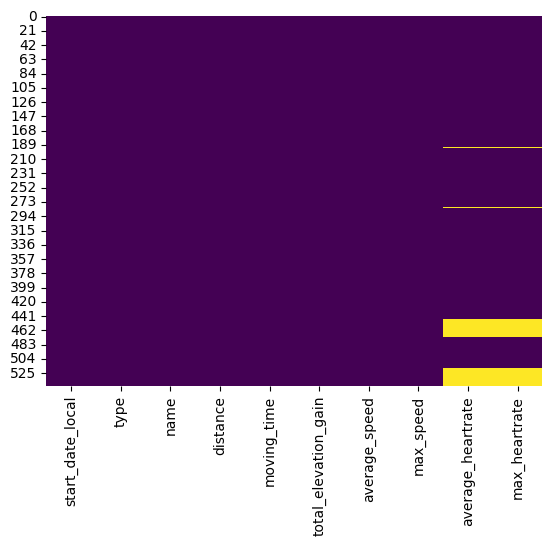

In [9]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

In [7]:
# Crear una lista de tuplas con los resultados
results = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    results.append((col, round(pct_missing, 2)))

# Convertir a DataFrame para mejor formato
results_df = pd.DataFrame(results, columns=['Columna', '% Faltante'])

# Imprimir como tabla Markdown
print(results_df.to_markdown(index=False, tablefmt="github", stralign="left", numalign="right"))

| Columna              |   % Faltante |
|----------------------|--------------|
| start_date_local     |            0 |
| type                 |            0 |
| name                 |            0 |
| distance             |            0 |
| moving_time          |            0 |
| total_elevation_gain |            0 |
| average_speed        |            0 |
| max_speed            |            0 |
| average_heartrate    |        10.11 |
| max_heartrate        |        10.11 |


In [ ]:
# aun no soy pro